# Machine Learning Zoomcamp Homeworks

## Session 2

### Dataset

In this homework, we will use the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `'price'`).

### EDA

* Load the data.
* Look at the `price` variable. Does it have a long tail?

In [1]:
# EDA

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data\AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


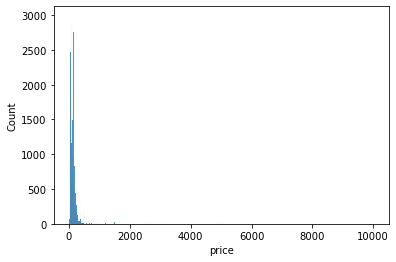

In [2]:
# EDA

sns.histplot(df['price'])

A long tail is clear in value distribution of 'price' column. Price values near (or equal to) 10000 can be found in dataset.

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [3]:
# column selection

desired_columns = ['latitude', 'longitude', 'price',
                   'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df_final = df[desired_columns]
df_final.head()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question #1

Find a feature with missing values. How many missing values does it have?

In [4]:
# answer to question #1

df_final.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The column `'reviews_per_month'` has **10052** missing values.

### Question #2

What's the median (50% percentile) for variable 'minimum_nights'?

In [5]:
# answer to question #2

df_final.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We see that half of the rows for `'minimum_nights'` column have a value equal or below `3`.

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [6]:
# data splitting

# get the right proportions of data
samples_count = len(df_final)
n_train = int(samples_count * 0.6)
n_valid = int(samples_count * 0.2)
print('total samples: {}\ntrain: {}\nvalidation: {}\ntest: {}'.format(samples_count, n_train, n_valid, samples_count-(n_train+n_valid)))

# generate idx for sampling
idx = np.arange(samples_count)
np.random.seed(42)
np.random.shuffle(idx)

# split dataframe into train/valid/test sets
df_train = df_final.iloc[idx[:n_train]]
df_valid = df_final.iloc[idx[n_train:(n_train+n_valid)]]
df_test  = df_final.iloc[idx[(n_train+n_valid):]]

# reset indices on sets
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

# create target values for each split by log transforming the "price" column
y_train = np.log1p(df_train['price'].to_numpy())
y_valid = np.log1p(df_valid['price'].to_numpy())
y_test  = np.log1p(df_test['price'].to_numpy())
# important note: we need to transfer back target values later after inference prediction
# we use np.expm1() to do so

# drop target column "price" from feature dataframes
del df_train['price']
del df_valid['price']
del df_test['price']


total samples: 48895
train: 29337
validation: 9779
test: 9779


### Question #3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [7]:
# answer to question #3

import math

# define evaluation metrics
def mse(y, y_pred):
    error = 0.0
    for yt, yp in zip(y, y_pred):
        error += (yt - yp) ** 2
    return (error / len(y))

def rmse(y, y_pred):
    return math.sqrt(mse(y, y_pred))


# define linear regression trainer
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


# address missing values by filling them with zero
X_train_zerofill = df_train.fillna(0).to_numpy()
X_valid_zerofill = df_valid.fillna(0).to_numpy()
X_test_zerofill  = df_test.fillna(0).to_numpy()

# address missing values by filling them with the mean (of train data)
# make a fresh copy of train/valid/test sets
X_train_meanfill = df_train.copy()
X_valid_meanfill = df_valid.copy()
X_test_meanfill  = df_test.copy()
# calculate mean for column with missing values and apply filling to all sets
mean_train_missing_column = df_train['reviews_per_month'].mean()
X_train_meanfill['reviews_per_month'] = X_train_meanfill['reviews_per_month'].fillna(mean_train_missing_column)
X_train_meanfill = X_train_meanfill.to_numpy()
X_valid_meanfill['reviews_per_month'] = X_valid_meanfill['reviews_per_month'].fillna(mean_train_missing_column)
X_valid_meanfill = X_valid_meanfill.to_numpy()
X_test_meanfill['reviews_per_month']  = X_test_meanfill['reviews_per_month'].fillna(mean_train_missing_column)
X_test_meanfill = X_test_meanfill.to_numpy()


# create and train linear regression models for both options
w0_zerofill, w_zerofill = train_linear_regression(X_train_zerofill, y_train)
y_pred_zerofill = w0_zerofill + X_valid_zerofill.dot(w_zerofill)
rmse_zerofill = rmse(y_valid, y_pred_zerofill)

w0_meanfill, w_meanfill = train_linear_regression(X_train_meanfill, y_train)
y_pred_meanfill = w0_meanfill + X_valid_meanfill.dot(w_meanfill)
rmse_meanfill = rmse(y_valid, y_pred_meanfill)

print('<<Rounded RMSEs>>\n > zero-filled: {}\n > mean-filled: {}\n'.format(round(rmse_zerofill, 2), round(rmse_meanfill, 2)))
print('<<Actual RMSEs>>\n > zero-filled: {}\n > mean-filled: {}'.format(rmse_zerofill, rmse_meanfill))


<<Rounded RMSEs>>
 > zero-filled: 0.64
 > mean-filled: 0.64

<<Actual RMSEs>>
 > zero-filled: 0.6430337788649602
 > mean-filled: 0.6427545031731412


We see that rounded value of RMSE error for both options (zero-filled and mean-filled) are the same.<br>
Therefore we can conclude that both options perform equally for this particular dataset.<br>
However, take note that without rounding the values, we can spot a slightly less (and better) RMSE for mean-filled set.

### Question #4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [8]:
# answer to question #4

# define linear regression trainer with reqularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


# calculate rmse scores for different regularization values
regularization_params = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores = []
for r_param in regularization_params:
    w0, w = train_linear_regression_reg(X_train_zerofill, y_train, r=r_param)
    y_pred = w0 + X_valid_zerofill.dot(w)
    rmse_score = rmse(y_valid, y_pred)
    rmse_scores.append(rmse_score)


print('Reg \t RMSE Score (Rounded)')
for r_param, rmse_score in zip(regularization_params, rmse_scores):
    print('{} \t {}'.format(r_param, round(rmse_score, 2)))

print('\nReg \t RMSE Score (Actual)')
for r_param, rmse_score in zip(regularization_params, rmse_scores):
    print('{} \t {}'.format(r_param, rmse_score))


print('\nRegularization value with best RMSE: ', regularization_params[rmse_scores.index(min(rmse_scores))])


Reg 	 RMSE Score (Rounded)
0 	 0.64
1e-06 	 0.64
0.0001 	 0.64
0.001 	 0.64
0.01 	 0.66
0.1 	 0.68
1 	 0.68
5 	 0.68
10 	 0.68

Reg 	 RMSE Score (Actual)
0 	 0.6430337788649602
1e-06 	 0.643034115734006
0.0001 	 0.6430723153643694
0.001 	 0.6437669735254038
0.01 	 0.6557528427434275
0.1 	 0.6773299642450086
1 	 0.6823116950157352
5 	 0.6827915727845699
10 	 0.6828430212099259

Regularization value with best RMSE:  0


### Question #5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.

In [9]:
# answer to question #5

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for random_seed in seed_values:
    # generate idx for sampling
    idx = np.arange(samples_count)
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    # split dataframe into train/valid/test sets
    df_train = df_final.iloc[idx[:n_train]]
    df_valid = df_final.iloc[idx[n_train:(n_train+n_valid)]]
    df_test  = df_final.iloc[idx[(n_train+n_valid):]]

    # reset indices on sets
    df_train = df_train.reset_index(drop=True)
    df_valid = df_valid.reset_index(drop=True)
    df_test  = df_test.reset_index(drop=True)

    # create target values for each split by log transforming the "price" column
    y_train = np.log1p(df_train['price'].to_numpy())
    y_valid = np.log1p(df_valid['price'].to_numpy())
    y_test = np.log1p(df_test['price'].to_numpy())

    # drop target column "price" from feature dataframes
    del df_train['price']
    del df_valid['price']
    del df_test['price']

    # address missing values by filling them with zero
    X_train = df_train.fillna(0).to_numpy()
    X_valid = df_valid.fillna(0).to_numpy()
    X_test  = df_test.fillna(0).to_numpy()

    # train linear regression model without regularization
    w0, w = train_linear_regression(X_train, y_train)
    # evaluate model on validation dataset and record the score
    y_pred = w0 + X_valid.dot(w)
    rmse_score = rmse(y_valid, y_pred)
    rmse_scores.append(rmse_score)


# check standard deviation of scores
print('Standard deviation of scores for different random seeds: {}'.format(round(np.std(rmse_scores), 3)))

Standard deviation of scores for different random seeds: 0.008


### Question #6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with `r=0.001`.
* What's the RMSE on the test dataset?

In [10]:
# answer to question #6

# generate idx for sampling
idx = np.arange(samples_count)
np.random.seed(9)
np.random.shuffle(idx)

# split dataframe into train/valid/test sets
df_train = df_final.iloc[idx[:n_train]]
df_valid = df_final.iloc[idx[n_train:(n_train+n_valid)]]
df_test  = df_final.iloc[idx[(n_train+n_valid):]]

# reset indices on sets
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

# create target values for each split by log transforming the "price" column
y_train = np.log1p(df_train['price'].to_numpy())
y_valid = np.log1p(df_valid['price'].to_numpy())
y_test  = np.log1p(df_test['price'].to_numpy())

# combine the train and validation sets
df_full_train = pd.concat([df_train, df_valid])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train  = np.concatenate([y_train, y_valid])

# drop target column "price" from feature dataframes
del df_full_train['price']
del df_test['price']

# address missing values by filling them with zero
X_full_train = df_full_train.fillna(0).to_numpy()
X_test       = df_test.fillna(0).to_numpy()

# train linear regression model with regularization = 0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test, y_pred)

print('<<RMSE score on test>>\n > actual: {}\n > rounded: {}'.format(rmse_score, round(rmse_score, 2)))


<<RMSE score on test>>
 > actual: 0.6452771348591307
 > rounded: 0.65
